In [1]:
print("Working")


Working


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("../data/telco_churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape


(7043, 21)

In [5]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isnull().sum()

np.int64(11)

In [8]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
df.isnull().sum()

/var/folders/_d/gq_jjbtx4x7f0vbyjjhh3x540000gn/T/ipykernel_91080/2884707198.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [10]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [13]:
df.groupby("Contract")["Churn"].value_counts(normalize=True)

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64

In [14]:
df.to_csv("../data/telco_churn_clean.csv", index=False)

/var/folders/_d/gq_jjbtx4x7f0vbyjjhh3x540000gn/T/ipykernel_91080/4160881937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="Set2")


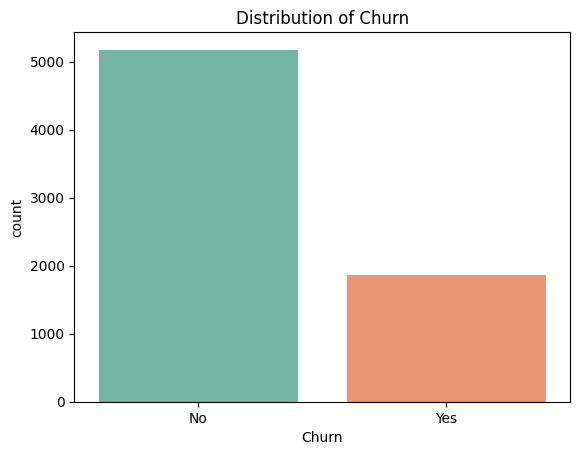

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [15]:
# Countplot for Churn
sns.countplot(data=df, x="Churn", palette="Set2")
plt.title("Distribution of Churn")
plt.show()

# Percentage display
churn_percent = df["Churn"].value_counts(normalize=True) * 100
print(churn_percent)

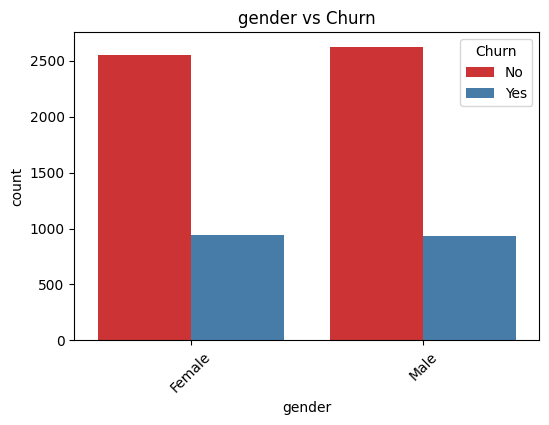

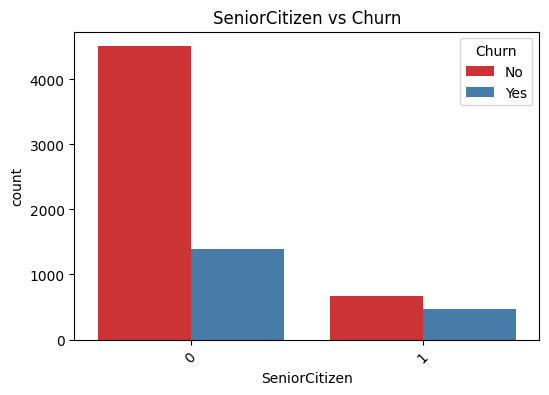

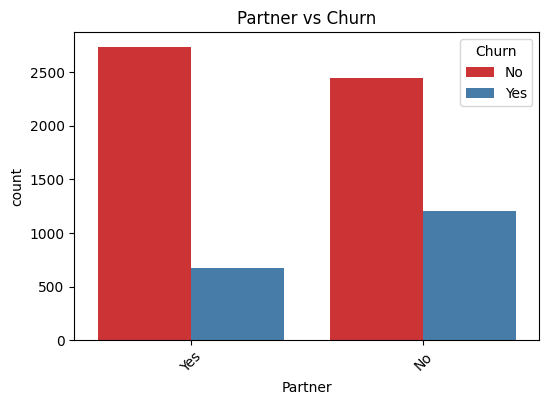

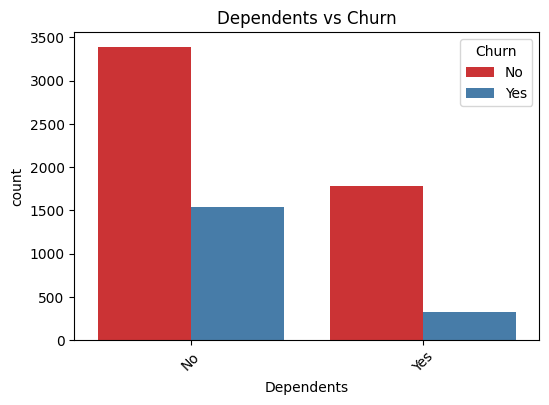

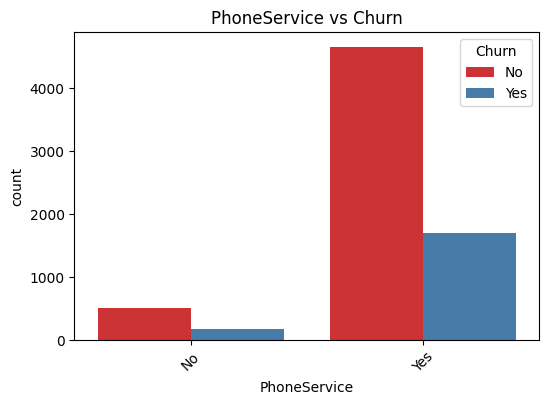

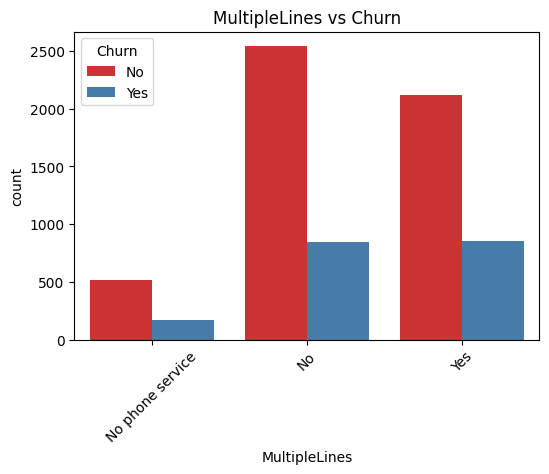

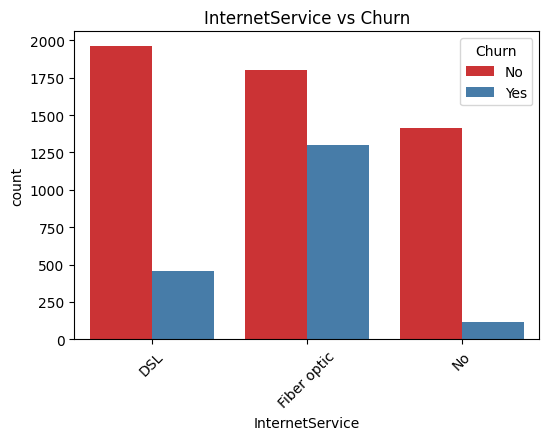

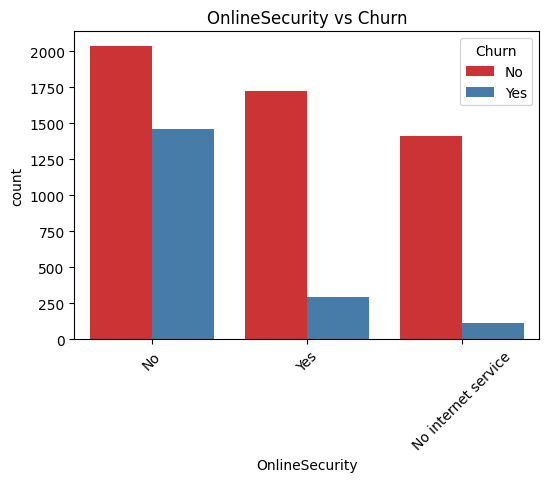

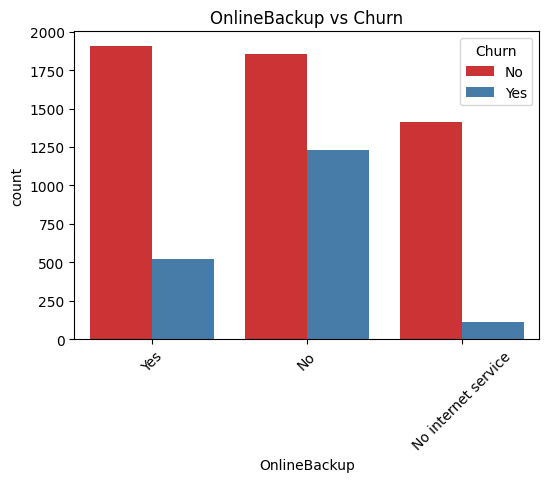

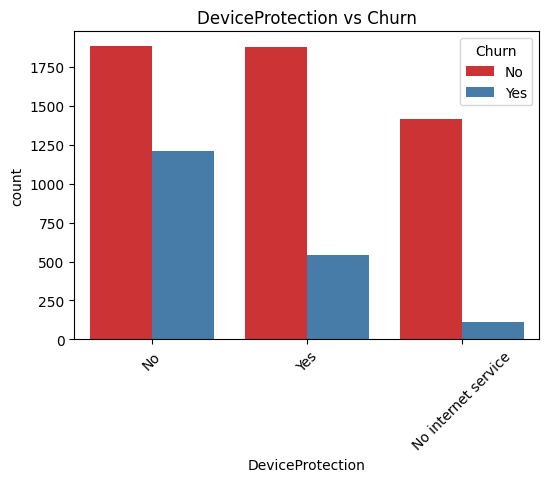

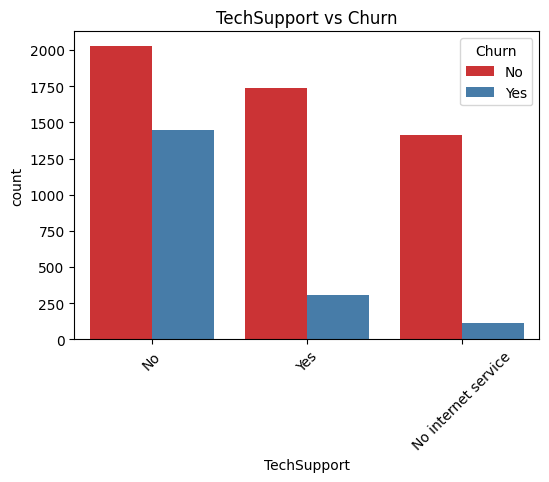

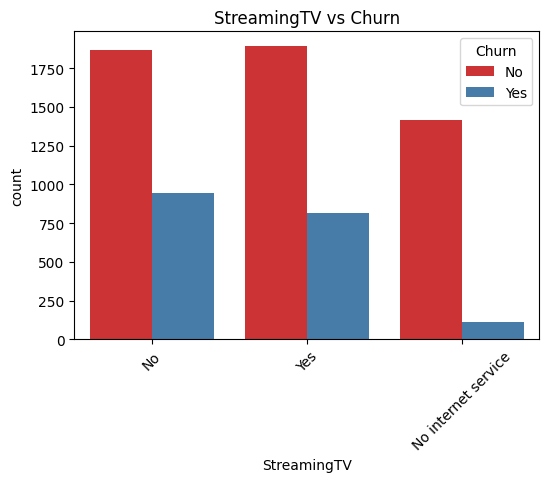

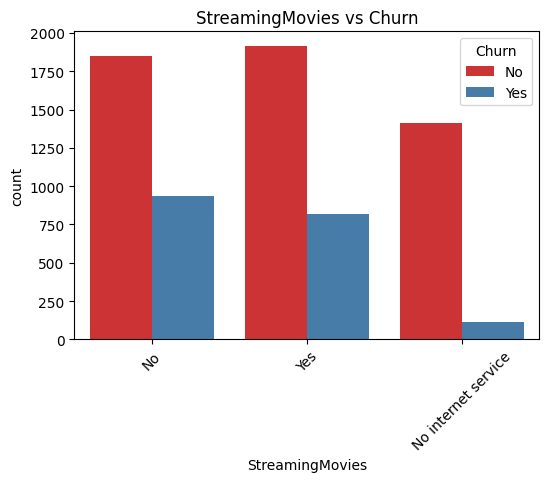

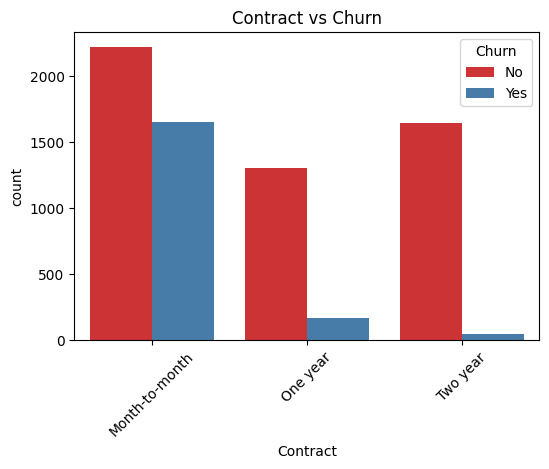

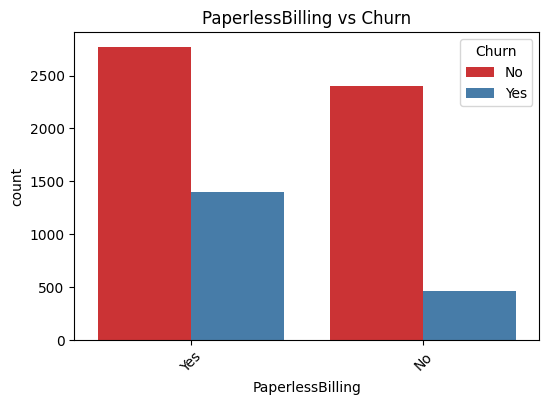

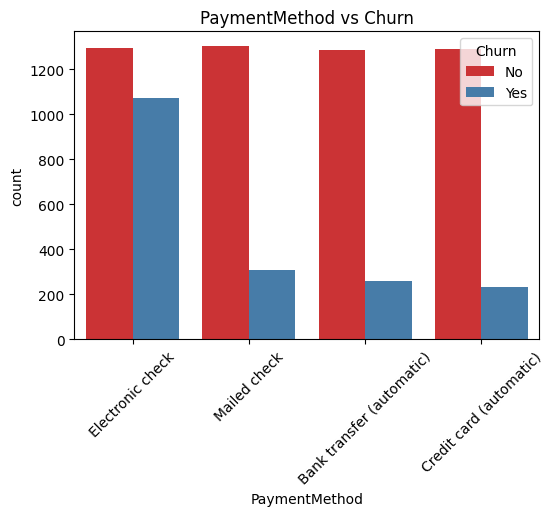

In [16]:
categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents",
                        "PhoneService", "MultipleLines", "InternetService",
                        "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                        "TechSupport", "StreamingTV", "StreamingMovies",
                        "Contract", "PaperlessBilling", "PaymentMethod"]

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn", palette="Set1")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

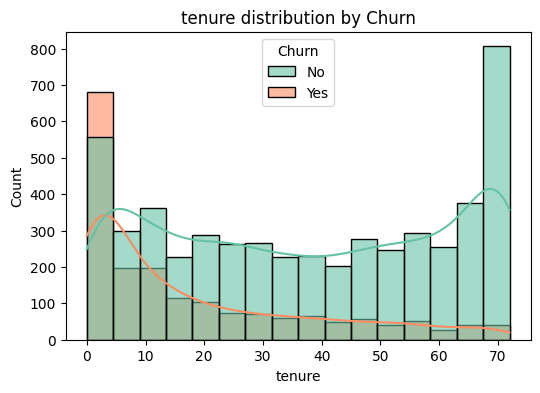

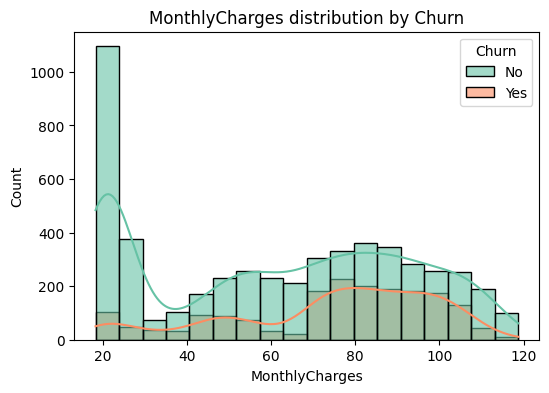

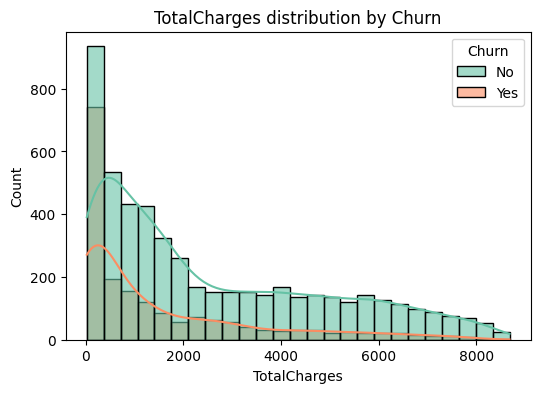

In [17]:
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, hue="Churn", palette="Set2", alpha=0.6)
    plt.title(f"{col} distribution by Churn")
    plt.show()
    

/var/folders/_d/gq_jjbtx4x7f0vbyjjhh3x540000gn/T/ipykernel_91080/1658086323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="Set3")


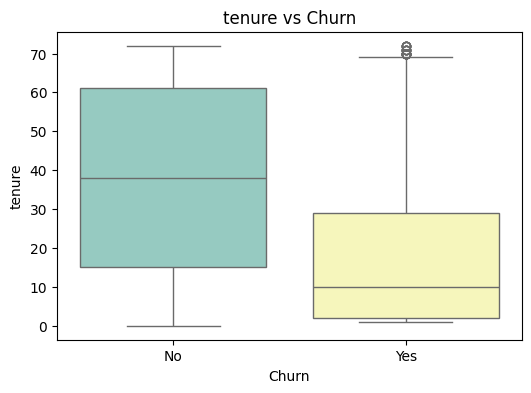

/var/folders/_d/gq_jjbtx4x7f0vbyjjhh3x540000gn/T/ipykernel_91080/1658086323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="Set3")


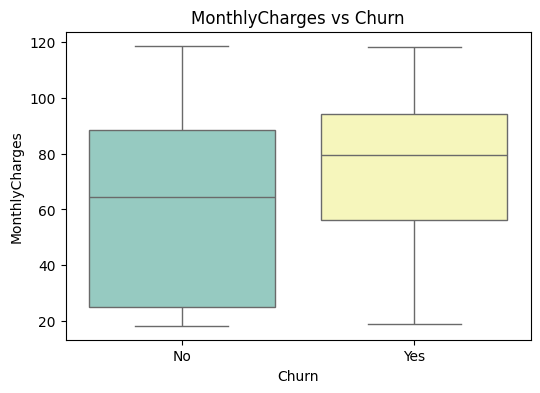

/var/folders/_d/gq_jjbtx4x7f0vbyjjhh3x540000gn/T/ipykernel_91080/1658086323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="Set3")


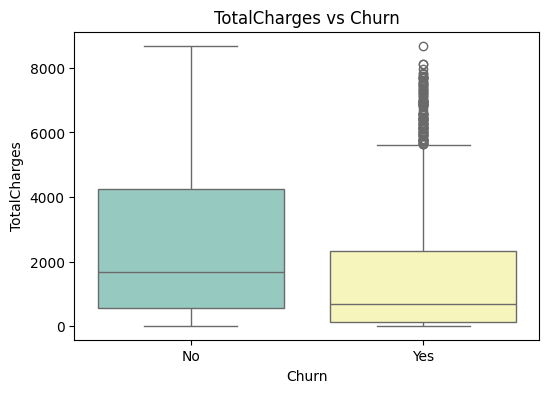

In [18]:
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="Churn", y=col, palette="Set3")
    plt.title(f"{col} vs Churn")
    plt.show()

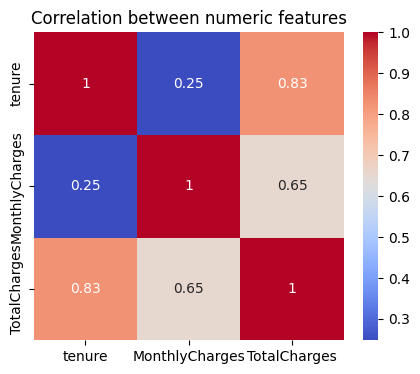

In [19]:
# Only numeric columns
numeric_df = df[["tenure", "MonthlyCharges", "TotalCharges"]]

plt.figure(figsize=(5,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between numeric features")
plt.show()

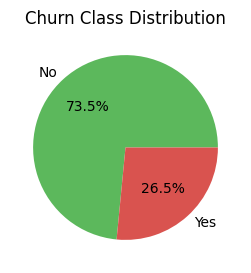

In [20]:
plt.figure(figsize=(5,3))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=["#5cb85c","#d9534f"])
plt.ylabel("")
plt.title("Churn Class Distribution")
plt.show()

In [21]:
# Save the cleaned dataset for modeling
df.to_csv("../data/telco_churn_clean.csv", index=False)